# Police vs Criminals (2015-2020)
### Analyst: Ralph Jordan Zapitan
The data set used in this analysis is available for download at www.kaggle.com. 

Here I analyzed the deadly fights between the police and criminals in the United States from years 2015 through 2020.

In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [131]:
df = pd.read_csv('shootings.csv')
df['date'] = pd.to_datetime(df.date)
df[:3]

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed


## Which state(s) do suspects get shot the most?

In [213]:
df.loc[df.manner_of_death == 'shot', :].state.value_counts()[:3]

CA    650
TX    398
FL    307
Name: state, dtype: int64

These are the top 3 states for which most suspects get shot the most, each with over 300 cases of shootings from the police. The numbers indicate the total number of people shot and killed by police in that state from years 2015-2020.

## Does the chance of getting shot by police depend on race?

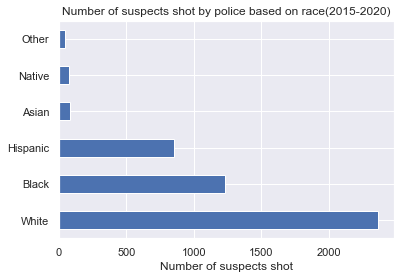

,Percentage of People Shot
White,50.79%
Black,26.45%
Hispanic,18.36%
Asian,1.83%
Native,1.66%
Other,0.93%


In [200]:
df.loc[df.manner_of_death == 'shot', :].race.value_counts().plot(kind = 'barh').set_title(
'Number of suspects shot by police based on race(2015-2020)')
plt.xlabel('Number of suspects shot')
plt.show()
pd.DataFrame(df.loc[df.manner_of_death == 'shot', :].race.value_counts(normalize = True).mul(100).round(2).astype(str) + '%').rename(
columns = {'race': 'Percentage of People Shot'})

This contradicts the myth that Blacks get shot the most due to racism, at least within the last 5 years. As shown on the table above, Whites are twice as likely to get shot as Blacks do.

## Which states had the most violent suspects?

In [211]:
df.loc[df.threat_level == 'attack', :].state.value_counts()[:3]

CA    393
TX    280
FL    209
Name: state, dtype: int64

Above are the top 3 states with the most dangerous suspects who fought back with the police. If we take a close look, these are the same states where most suspects were killed by police. We can conclude from here that California, Texas, and Florida are the three most dangerous states to live in.

## Which states had the most cases of attacks from suspects armed with a gun?

In [217]:
index = (df.armed == 'gun') & (df.threat_level == 'attack')
df.loc[index, :].state.value_counts()[:4]

CA    221
TX    204
FL    140
AZ    100
Name: state, dtype: int64

These are the top 4 states for which most suspects fought against the police with a gun, each state having at least 100 cases. Again, California, Texas, and Florida are among these dangerous states.

## Are violent behaviors from criminals mostly triggered by their signs of mental illnesses?

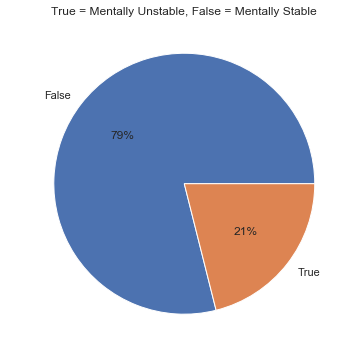

False    2494
True      666
Name: signs_of_mental_illness, dtype: int64

In [286]:
df.loc[df.threat_level == 'attack', :].signs_of_mental_illness.value_counts().plot(kind = 'pie', autopct = '%0.0f%%', figsize = (6, 6)).set_title(
'True = Mentally Unstable, False = Mentally Stable')
plt.ylabel(' ')
plt.show()
df.loc[df.threat_level == 'attack', :].signs_of_mental_illness.value_counts()

If True, the suspect showed signs of mental illness, and False if not. As the pie chart indicates, suspects who are mentally stable are actually more dangerous than those who are unstable.

## What day of week has the most number of attacks from criminals?

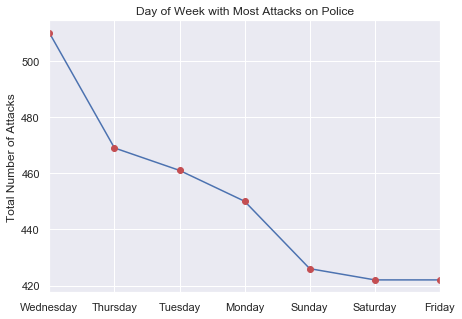

,Total Number of Attacks from Criminals
Wednesday,510
Thursday,469
Tuesday,461
Monday,450
Sunday,426
Saturday,422
Friday,422


In [285]:
ser = df.loc[df.threat_level == 'attack', :].date.dt.day_name().value_counts()
ser.plot(figsize = (7, 5)).set_title('Day of Week with Most Attacks on Police')
plt.ylabel('Total Number of Attacks')
plt.plot(ser.index.values, ser.values, 'ro')
plt.show()
pd.DataFrame(ser).rename(columns = {'date': 'Total Number of Attacks from Criminals'})

Wednesday(s) had the most number of criminal attacks, while Friday(s) and Saturday(s) had the least.

## How did the shootings and killings vary by year?

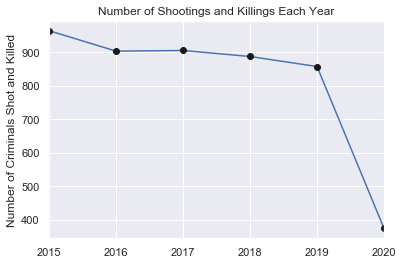

,Number of Criminals Killed
2015,965
2017,906
2016,904
2018,888
2019,858
2020,374


In [332]:
ser = df.date.dt.year.value_counts().sort_index()
ser.plot().set_title('Number of Shootings and Killings Each Year')
plt.ylabel('Number of Criminals Shot and Killed')
plt.plot(ser.index.values, ser.values, 'ko')
plt.show()
pd.DataFrame(ser.sort_values(ascending = False)).rename(columns = {'date': 'Number of Criminals Killed'})

The number of fatal encounters between police and criminals dropped significantly from 2019 to present by more than half. The reason for this was possibly due to the pandemic. Since most people are staying at home, they are staying safe at the comfort of their homes and therefore they are away from any possible danger outdoors.

## Who were the first criminals that died at the hands of police at the beginning of each year?
How were they killed? Were they armed? What was their race? Age? Gender? Threat level? Did they try to flee before getting shot?

In [367]:
indices = []
Reindexed = df.reset_index().rename(columns = {'index': 'col1'})
Reindexed['year'] = Reindexed.date.dt.year
for i in Reindexed.year.unique():
    indices.append(Reindexed.loc[Reindexed.year == i, :].col1.values[0])
indices
Reindexed.loc[indices, ['name', 'age', 'gender', 'year', 'manner_of_death', 'armed', 'race', 'threat_level', 'flee']].set_index('name').rename(
columns = {'year': 'year_of_death'})

,age,gender,year_of_death,manner_of_death,armed,race,threat_level,flee
name,,,,,,,,
Tim Elliot,53.0,M,2015,shot,gun,Asian,attack,Not fleeing
Joshua Sisson,30.0,M,2016,shot,knife,White,other,Not fleeing
John McLaughlin,42.0,M,2017,shot,gun,White,other,Not fleeing
Mark Steven Parkinson,65.0,M,2018,shot,gun,White,attack,Not fleeing
Dylan Michael Smith,26.0,M,2019,shot,gun,White,attack,Foot
Derrick A. Elseth,24.0,M,2020,shot,gun,White,other,Not fleeing


## Who were the suspects that died in Las Vegas within the past 5 years?

In [385]:
vegas = df.loc[df.city.str.contains('las vegas', case = False).dropna(), ['name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'signs_of_mental_illness', 'threat_level', 'flee']].set_index('name')
vegas

,date,manner_of_death,armed,age,gender,race,city,signs_of_mental_illness,threat_level,flee
name,,,,,,,,,,
Salvador Figueroa,2015-01-11,shot and Tasered,gun,29.0,M,Hispanic,North Las Vegas,False,attack,Foot
Francis Spivey,2015-02-25,shot,gun,43.0,M,White,Las Vegas,True,attack,Not fleeing
James Michael Todora,2015-07-10,shot,gun,54.0,M,White,Las Vegas,True,attack,Not fleeing
Bryan Keith Day,2015-07-25,shot,toy weapon,36.0,M,Black,Las Vegas,False,attack,Not fleeing
Abel Correa,2015-08-07,shot,sharp object,24.0,M,Hispanic,Las Vegas,True,other,Not fleeing
William Lee Snider,2015-08-23,shot,gun,57.0,M,White,Las Vegas,False,attack,Not fleeing
James Marcus Brown,2015-08-29,shot,gun,25.0,M,Black,North Las Vegas,False,attack,Foot
Linda Lee Lush,2015-10-15,shot,gun,50.0,F,White,Las Vegas,True,attack,Car
James Francis Smyth,2015-11-06,shot,unknown,55.0,M,White,Las Vegas,False,other,Car


## How does Las Vegas compare with other cities for being "Safer" than most cities to live in?

In [406]:
len(vegas)/len(df)

0.009193054136874362

There were $ 45 $ suspects killed in Las Vegas within the past 5 years. Of all the fatal encounters between the police and criminals that took place in all the cities in the United States from year 2015 through 2020, we make up less than $ 1\% $ of them all. While this seems very low and it's tempting to say that we're one of the safest cities in the country, it is quite high considering that there are almost $ 2300 $ cities documented in the data. The lowest is exactly $ 0.02\% $, which is about 4 times smaller than what we have in Las Vegas.

## Who was the oldest criminal killed?

In [404]:
df.loc[df.age == df.age.max(), :].drop('id', axis = 1).set_index('name')

,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
name,,,,,,,,,,,,,
Frank W. Wratny,2017-03-08,shot,gun,91.0,M,White,Union Township,PA,False,attack,Not fleeing,False,Guns


## During a confrontation between the police and suspects, what is the probability the that the suspects will fight back using a gun?
This is important information for officers so they know to keep their guard up.

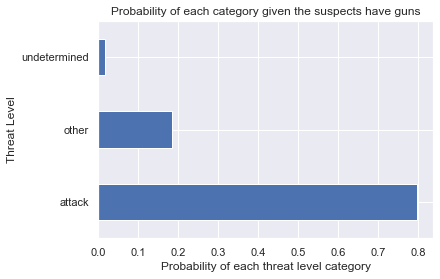

,Probability of Threat Level
attack,79.85%
other,18.42%
undetermined,1.74%


In [417]:
df.loc[df.arms_category == 'Guns', :].threat_level.value_counts(normalize = True, dropna = False).plot(kind = 'barh').set_title('Probability of each category given the suspects have guns')
plt.xlabel('Probability of each threat level category')
plt.ylabel('Threat Level')
plt.show()
pd.DataFrame(df.loc[df.arms_category == 'Guns', :].threat_level.value_counts(normalize = True).mul(100).round(2).astype(str) + '%').rename(columns = {'threat_level': 'Probability of Threat Level'})

The table and bar chart above indicates that, given that a suspect possesses a long range weapon, his probability of attacking an officer(s) during a confrontation is almost $ 80 \% $.

## Race of criminals armed with guns that were caught on body cams.

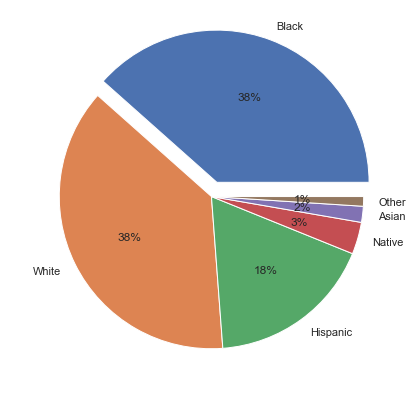

,Number of Gun Armed Criminals Caught on Body Cams
Black,113
White,111
Hispanic,52
Native,10
Asian,5
Other,3


In [432]:
df.loc[(df.body_camera == True) & (df.arms_category == 'Guns'), :].race.value_counts().plot(kind = 'pie', figsize = (7, 7), autopct = '%0.0f%%', explode = [0.1, 0, 0, 0, 0, 0])
plt.ylabel(' ')
plt.show()
pd.DataFrame(df.loc[(df.body_camera == True) & (df.arms_category == 'Guns'), :].race.value_counts()).rename(columns = {'race': 'Number of Gun Armed Criminals Caught on Body Cams'})

In this case, Blacks exceeds Whites by just a couple more.